In [11]:
from constants import *
from scripts.scripts import *
from scripts.gdal_scripts import *

In [12]:
main_name = "test_grid02-nearest-None-None-6e-05-3e-05-None-0-0"
gdal_print_metadata(tif_name=main_name)    

Driver: GTiff/GeoTIFF
Files: tif_files/test_grid02-nearest-None-None-6e-05-3e-05-None-0-0.tif
Size is 64, 64
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (9.065843041000001,56.834808879999997)
Pixel Size = (0.000011319437500,0.000006025937500)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (   9.0658430,  56.8348089) (  9d 3'57.03"E, 56d50' 5.31"N)
Lower Left  (   9.0658430,  56.8351945) (  9d 3'57.03"E, 56d50

In [1]:
# import osgeo_utils.gdal_polygonize
from osgeo_utils.gdal_polygonize import gdal_polygonize
# def gdal_polygonize(src_filename: Optional[str] = None, band_number: Union[int, str] = 1,
#                     dst_filename: Optional[str] = None, driver_name: Optional[str] = None,
#                     dst_layername: Optional[str] = None, dst_fieldname: Optional[str] = None,
#                     quiet: bool = False, mask: str = 'default', options: Optional[list] = None,
#                     connectedness8: bool = False):

def make_polygons(
        input_tif:str,
        input_band:int=1,
        output_shp:str=None,
        output_layer:str=None,
        output_field:str=None,
        connectedness8:bool=False,
        options:str=None,
        ) -> None:
    assert '.tif' not in input_tif
    assert '.shp' not in output_shp

    input_tif = TIF_PATH+input_tif+".tif" if input_tif else None
    output_shp = SHP_PATH+output_shp+".shp.zip" if output_shp else None

    src_ds = TIF_PATH+'sample.tif'
    dst_filename = SHP_PATH+'sample.shp.zip'
    gdal_polygonize(
        src_filename=input_tif,
        dst_filename=output_shp,
        band_number=input_band,
        dst_layername=output_layer,
        dst_fieldname=output_field,
        connectedness8=connectedness8,
        options=options)

make_polygons(
    input_tif=main_name,
    output_shp=main_name,
)

NameError: name 'main_name' is not defined

In [17]:
from osgeo import gdal
from osgeo import ogr
from osgeo import gdalconst

ndsm = TIF_PATH+main_name+'.tif'
# shp = 'polygon.shp'
data = gdal.Open(ndsm, gdalconst.GA_ReadOnly)


In [73]:
sample = "sample2"
shp_name = "test_grid02"
# from osgeo import RasterizeOptions
options = gdal.RasterizeOptions(attribute="value",outputType=gdalconst.GDT_Byte,width=256,height=256,noData=0)
gdal.Rasterize(
    destNameOrDestDS=TIF_PATH+sample+".tif",
    srcDS=SHP_PATH+shp_name+".shp.zip",
    options=options)

TypeError: in method 'wrapper_GDALRasterizeDestName', argument 2 of type 'GDALDatasetShadow *'

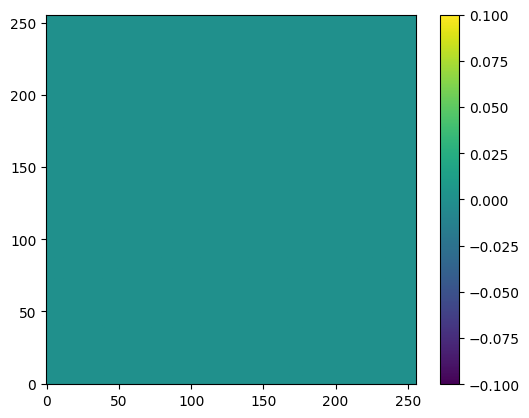

In [74]:
plot_raster(tif_name=sample)